<a href="https://colab.research.google.com/github/ostapovvyyych/Machine-learning/blob/main/%D0%9E%D1%81%D1%82%D0%B0%D0%BF%D0%BE%D0%B2%D0%B8%D1%87_8_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практична робота 08.10

Створити автокодувальник для датасету рукописних цифр за допомогою бібліотеки Keras (використовуємо тільки звичайні шари).
- Побудувати автокодувальник без шуму, графік функції втрат, результати розпізнавання.
- Побудувати автокодувальник із шумом, графік функції втрат, результати розпізнавання.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, models

In [ ]:
(x_train, y), (x_test, y) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.reshape(x_train, (len(x_train), 28 * 28))
x_test = np.reshape(x_test, (len(x_test), 28 * 28))

input_img = layers.Input(shape=(784,))

In [ ]:
# Енкодер
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

# Декодер
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# тренування моделі
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

decoded_imgs = autoencoder.predict(x_test)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.3337 - val_loss: 0.1644
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1562 - val_loss: 0.1364
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1346 - val_loss: 0.1255
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1245 - val_loss: 0.1175
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1176 - val_loss: 0.1122
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1128 - val_loss: 0.1088
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1094 - val_loss: 0.1057
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1065 - val_loss: 0.1030
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1033 - val_loss: 0.1008
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1012 - val_loss: 0.0992
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0997 - val_loss: 0.0975
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

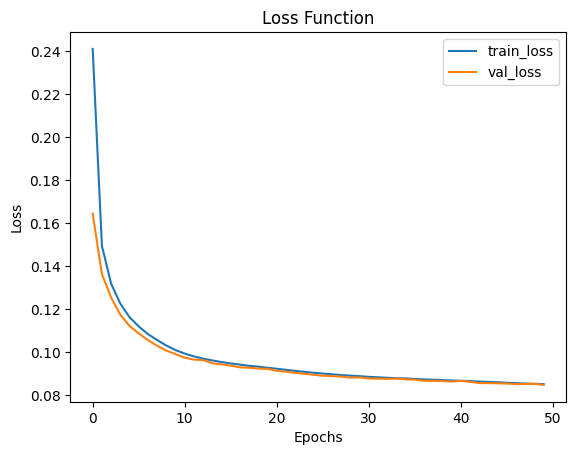

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

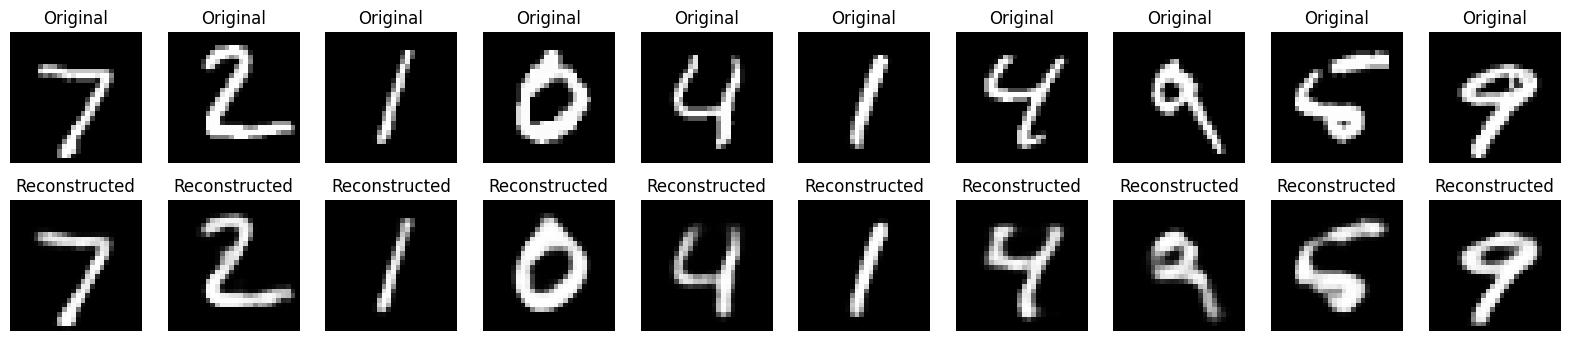

In [ ]:
num_images = 10
plt.figure(figsize=(20, 4))

for i in range(num_images):
    original_ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.gray()
    original_ax.axis('off')

    reconstructed_ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.gray()
    reconstructed_ax.axis('off')

plt.show()

In [ ]:
# додавання шуму
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_images, 0., 1.)

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

history_noisy = autoencoder.fit(x_train_noisy, x_train,
                                 epochs=50,
                                 batch_size=256,
                                 shuffle=True,
                                 validation_data=(x_test_noisy, x_test))

decoded_imgs_noisy = autoencoder.predict(x_test_noisy)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1836 - val_loss: 0.1301
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1281 - val_loss: 0.1236
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1233 - val_loss: 0.1221
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1211 - val_loss: 0.1206
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1200 - val_loss: 0.1192
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1190 - val_loss: 0.1189
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1182 - val_loss: 0.1185
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1175 - val_loss: 0.1182
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1171 - val_loss: 0.1179
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1168 - val_loss: 0.1176
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1167 - val_loss: 0.1176
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

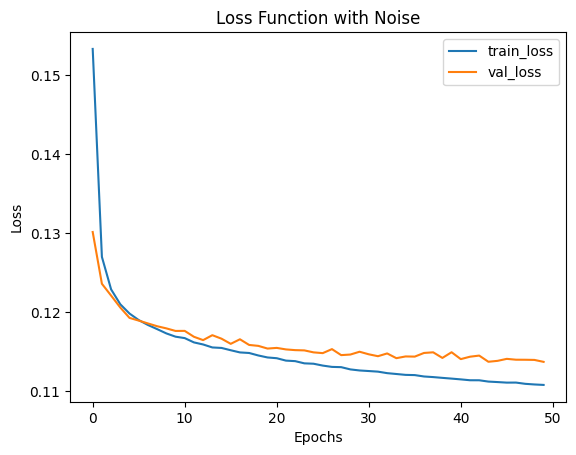

In [ ]:
plt.plot(history_noisy.history['loss'], label='train_loss')
plt.plot(history_noisy.history['val_loss'], label='val_loss')
plt.title('Loss Function with Noise')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

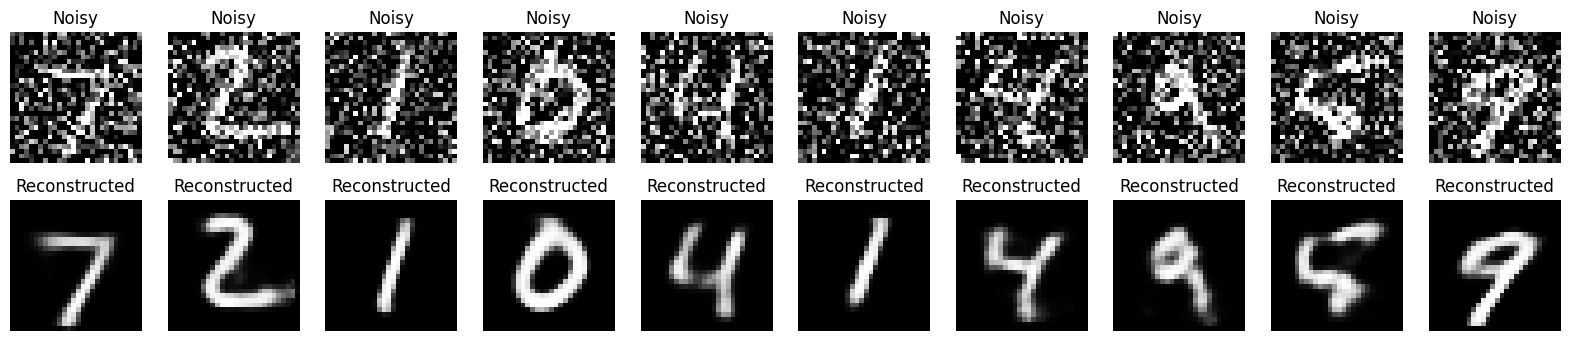

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis("off")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


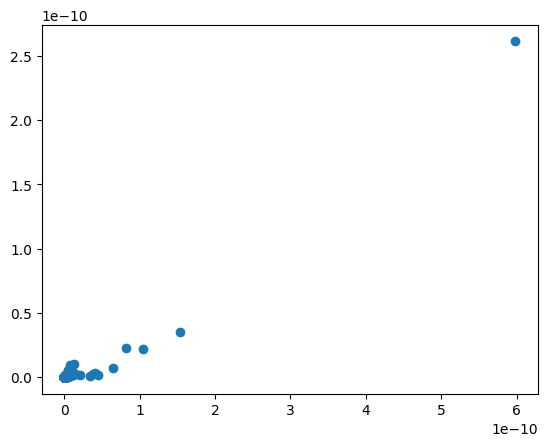

In [ ]:
h = autoencoder.predict(x_test)
plt.scatter(h[:, 0], h[:, 1])

Висновки:
Автокодувальник продемонстрував чудові результати по навчанню та виділенню ознак з даних і досить ефективно відновлював їх.